In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm 

In [157]:
def oscilador(x,omega):
    return -omega**2*x


In [176]:
def Verlet(a,x0,v0,t,omega,h):
    
    
    
    x=np.zeros_like(t)
    v=np.zeros_like(t)
    
    x[0]=x0
    x[1]=x[0] + h*v0
    v[0]=v0
    v[1]=x[0] + h*a(x[1],omega)
    
    for i in range(2,len(x)):
        
        x[i]= 2*x[i-1]-x[i-2]+ a(x[i-1],omega)*h**2
        v[i] = (x[i]-x[i-2])/(2*h)
        
    return x,v
    
    
    
    
    

# Estable $h<2/\omega$

In [177]:
omega=np.pi
h=0.1 #estable
t=np.arange(0,10,h)

x0=1
v0=1

In [178]:
x_,vx_= Verlet(oscilador,x0,v0,t,omega,h)

<IPython.core.display.Javascript object>


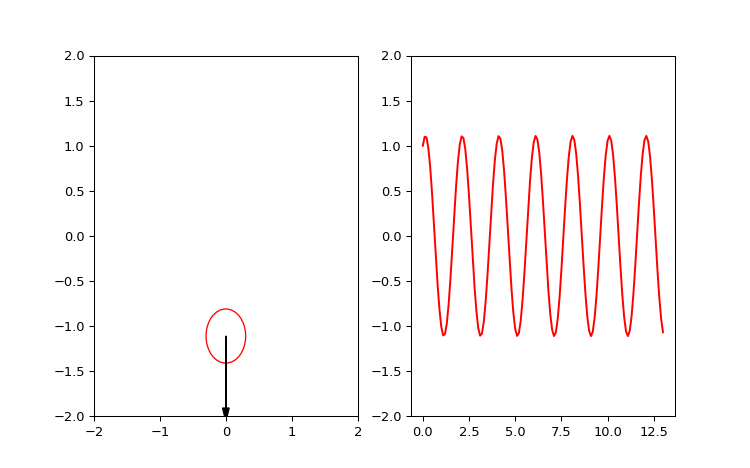

In [195]:
scale=1
t1= t[::scale]
X_=x_[::scale]
VX=vx_[::scale]

fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

def init():
    

    ax.clear()
    ax.set_xlim(-2,2)
    ax.set_ylim(-2,2)

    

    ax1.clear()
    ax1.set_ylim(-2,2)
   
    
def Update(i):
    
    init()
    
    x = X_[i]
    
  
    

    vx =VX[i]
    #ax.quiver([0,x],0,vx,length=0.5)
    
    circle = plt.Circle( (0,x), 0.3, color='r', fill=False )
    ax.add_patch(circle)
       
    ax.arrow(0,x,0,vx,color='k',head_width=0.1,length_includes_head=True)
    
    ax1.plot( t1[0:i] , X_[0:i],color="r")
       
    
        
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t1),init_func=init)

# Inestable $h>2/omega$

In [196]:
omega=np.pi
h_in=2/(omega) #inestable
t_in=np.arange(0,15,h_in)

x0=1
v0=1

In [197]:
x_in,vx_in= Verlet(oscilador,x0,v0,t_in,omega,h_in)

<IPython.core.display.Javascript object>


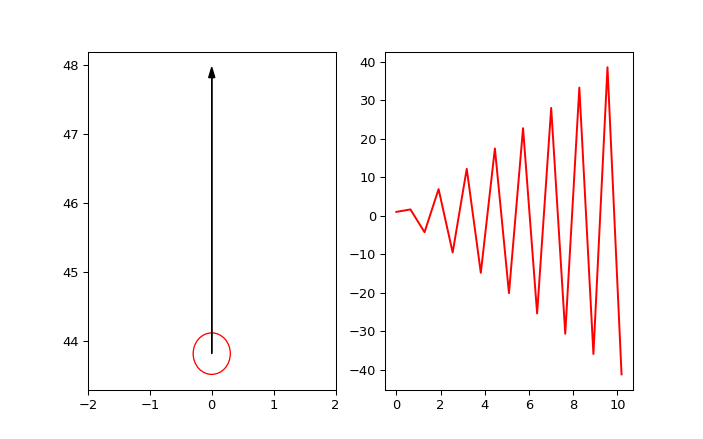

In [198]:
scale_in=1
t1_in= t_in[::scale_in]
X_in=x_in[::scale_in]
VX_in=vx_in[::scale_in]

fig2 = plt.figure(figsize=(8,5))
ax2 = fig2.add_subplot(121)
ax3 = fig2.add_subplot(122)

def init_in():
    

    ax2.clear()
    ax2.set_xlim(-2,2)
   

    

    ax3.clear()
    
    
def Update_in(i):
    
    init_in()
    
    x = X_in[i]
    
  
    

    vx =VX_in[i]

    
    circle = plt.Circle( (0,x), 0.3, color='r', fill=False )
    ax2.add_patch(circle)
       
    ax2.arrow(0,x,0,vx,color='k',head_width=0.1,length_includes_head=True)
    
    ax3.plot(t1_in[0:i],X_in[0:i],color="r")
       
    
        
    
Animation_in= anim.FuncAnimation(fig2,Update_in,frames=len(t1_in),init_func=init)

array([0.])